## 02 - Image Enhancement using pixelwise operators
(Moacir A. Ponti, ICMC/USP, 2020)

This notebook shows how to enhance images by transforming the pixel values of some input image, into new pixel values producing a better output image

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

Pixel-wise operations transform input pixels $z$ that are within some intensity level interval, such as $[0,255]$, into another pixel $s$.

To show that, let us create a vetor with the 256 possible graylevels and work with that to show different types of transformations


In [3]:
# numpy's arange creates a vetor of a range of values - below, in the interval [0,256)
z = np.arange(256)
print(z)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

The `np.arange()` function allows more parameters, in the format `np.arange(start, end, step)`. In such case the functions returns an array whose first value is defined by `start`, the last value is less than `end` and with increment defined by `step`. For example:

In [4]:
print(np.arange(1, 3, 0.25))

[1.   1.25 1.5  1.75 2.   2.25 2.5  2.75]


##### Pixel-wise operators
Transform the value $r$ of some input pixel in a new value $s$ via a transformation of the graylevel interval, e.g. 0 to 255. This can be written as: $$s = T(z)$$

For instance, the identity transformation copies the values, without transformation, i.e.:
$$s = T(z) = z$$

The inversion or negative transformation, is given by:
$$s = T(z) = 255-z$$

In [5]:
s_ident = z
s_inver = 255-z

Because the variable r is actually an array of values (between 0 and 255) we can then plot/visualize the transformation or mapping: one axis shows the $r$ or input values and the other the $s$ or output values:

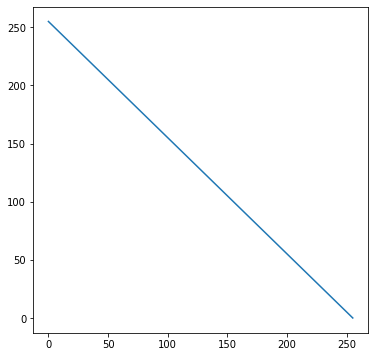

In [6]:
plt.figure(figsize=(6,6)) # makes sure the figure will appear with a square size (not rectangular)
plt.plot(z, s_inver) # plots r against s


Let us load images and perform the inversion operation

In [39]:
img1 = imageio.imread("images/quote2.png")
img2 = imageio.imread("images/scarlett.jpg")

img1_invert = 255-img1
img2_invert = 255-img2

(-0.5, 639.5, 399.5, -0.5)

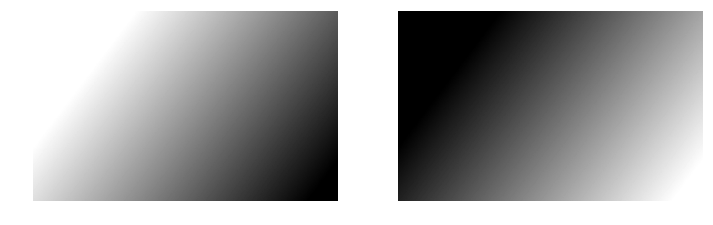

In [14]:
plt.figure(figsize=(12,12)) 
 
# defines a panel to show the images side by side
plt.subplot(121) # panel with 1 row, 2 columns, to show the image at the first (1st) position
plt.imshow(img1, cmap="gray")
plt.axis('off') # remove axis with numbers

plt.subplot(122) # panel with 1 row, 2 columns, to show the image at the second (2nd) position
plt.imshow(img1_invert, cmap="gray")
plt.axis('off')



(-0.5, 511.5, 511.5, -0.5)

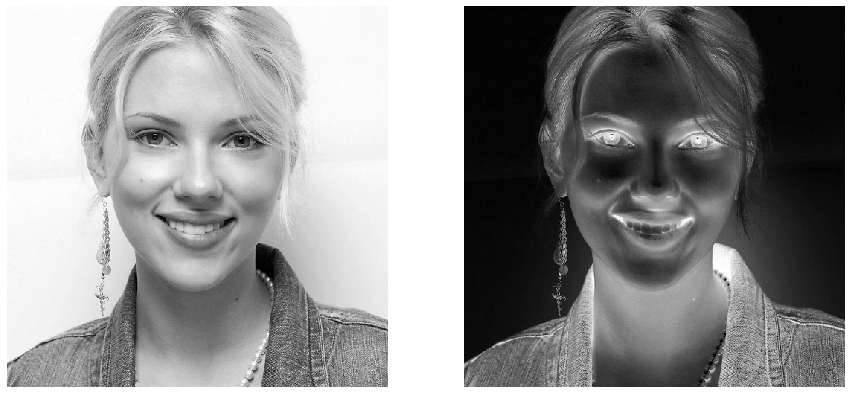

In [77]:
plt.figure(figsize=(15,15)) 
 
# defines a panel to show the images side by side
plt.subplot(121) # panel with 1 row, 2 columns, to show the image at the first (1st) position
plt.imshow(img2, cmap="gray")
plt.axis('off') # remove axis with numbers

plt.subplot(122) # panel with 1 row, 2 columns, to show the image at the second (2nd) position
plt.imshow(img2_invert, cmap="gray")
plt.axis('off')

#### Logarithmic enhancement

Mathematical functions are usually employed to enhance images. The $\log$ function decreases the dynamic range between the gray levels so that dark pixels become more bright.

However, it is important to find a transformation to map values between 0 and 255 to values also in the same range. If we just apply a log, for example, using base 2:

$$s = \log_2(z)$$ assuming $$z = 128$$ we would have:

$$s = \log_2(128) = 7$$ which is too low.

Let us plot this.

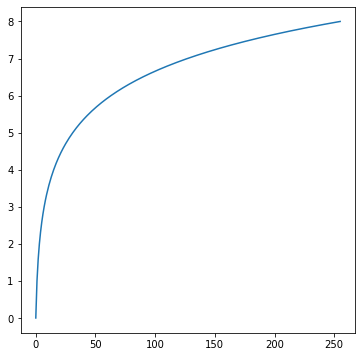

In [7]:
z_log2 = np.log2(z + 1)
plt.figure(figsize=(6,6))
plt.plot(z, z_log2)

We are going to use a correction factor to rescale the range back to the desired one. This factor is defined as:
$$ \frac{L}{\log_2(1+L)}$$
in which $L$ is the maximum gray levels to reescale, e.g. 255.

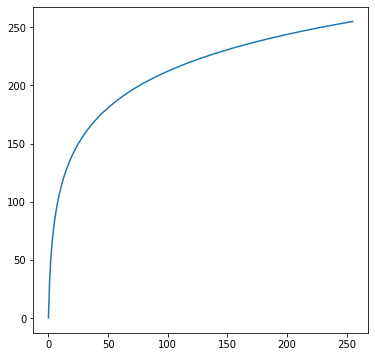

In [8]:
c_scale = 255 / (np.log2(1+255))
z_log2 = c_scale * np.log2(z + 1)
plt.figure(figsize=(6,6)) 
plt.plot(z, z_log2)

Let us apply this in an image now.

In [65]:
img3 = imageio.imread("images/nap.jpg")
# using the same scale factor, for 255
img3_log2 = (c_scale * np.log2(1 + img3.astype(np.int32))).astype(np.uint8)

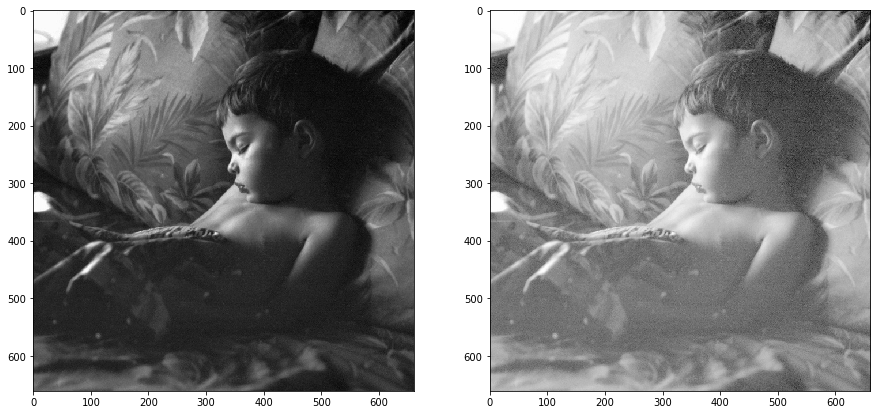

In [76]:
plt.figure(figsize=(15,15)) 
 
plt.subplot(121)
plt.imshow(img3, cmap="gray")
plt.subplot(122)
plt.imshow(img3_log2, cmap="gray")

#### Thresholding

Often applied as a simple segmentation method, it is a step function that outputs only two values, relative to pixels outside or within regions of interest

In [68]:
# defining some arbitrary threshold
T = 100

# the where function returns all coordinates matching the conditional
indL = np.where(img1 > T)

# create a new image with the same size of the input 
img1_thresh = np.zeros(img1.shape)

img1_thresh[indL] = 1 # assigns 1 to all pixels above the threshold value

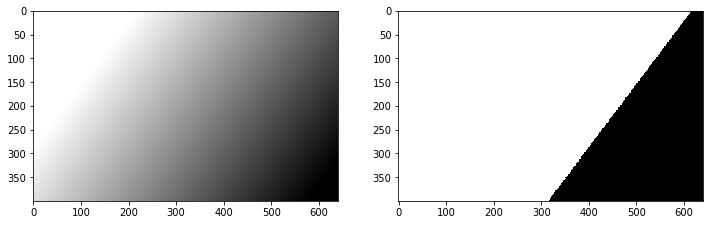

In [69]:
plt.figure(figsize=(12,12)) 
 
plt.subplot(121)
plt.imshow(img1, cmap="gray")
plt.subplot(122)
plt.imshow(img1_thresh, cmap="gray")

#### Gamma curve correction

Adjust the graylevels using a power transformation. This is often used to adjust the display to better suit the human vision light perception curve

This transformation is given by:
$$s = T(z) = r^{\gamma}$$

Note, again that we need to make sure the output matches the range of graylevels. In this case we are going to first normalize the pixels to 0-1 interval, and then reescale back to 0-255 as follows


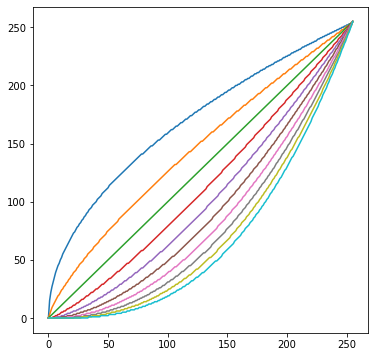

In [11]:
R = 255.00 # maximum graylevel

plt.figure(figsize=(6,6))
# plotting the gamma adjustment function for different Gamma values: between 0.5 and 2.75 with step 0.25
for gamma in np.arange(0.5, 3.0, 0.25):
    z_gamma = (R * np.power(z / R, gamma)).astype(np.uint8)
    plt.plot(z, z_gamma)

Note that the gamma correction may work similarly to a logarithmic function (increase the dynamic range of dark pixels) as for the blue curve that shows the square root transformation (gamma=0.5), or instead, for gamma > 1, increase the dynamic range of bright pixels.

#### Logistic function
Another function that may be interesting to use in order to improve contrast is the sigmoid logistic function, that has an "S" shape

In [59]:
k = 0.025
s_sigmoid = (255/(1+np.exp(-k*(z-127)))).astype(np.uint8)

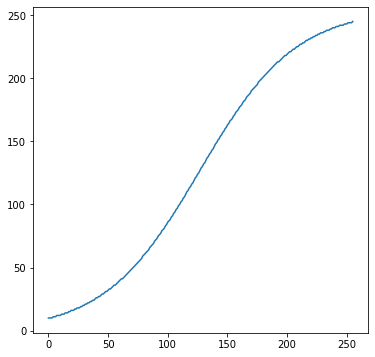

In [60]:
plt.figure(figsize=(6,6))
plt.plot(z,s_sigmoid)

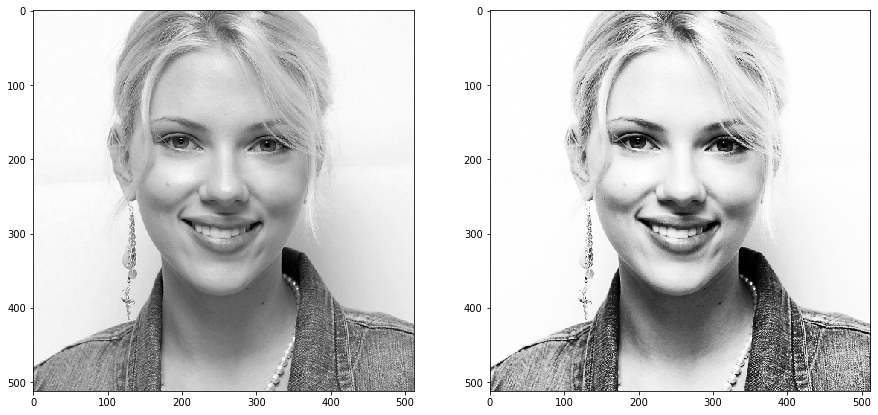

In [75]:
k = 0.03
img2_sigm = (255/(1+np.exp(-k*(img2.astype(np.int32)-127)))).astype(np.uint8)

plt.figure(figsize=(15,15)) 
plt.subplot(121)
plt.imshow(img2, cmap="gray")
plt.subplot(122)
plt.imshow(img2_sigm, cmap="gray")

#### Bit plane slicing

We can slice the graylevels in terms of the bits contained in each one of the 8 positions. This may reveal interesting information to better understand where are the most relevant data, and to understand the noise that is often contained in the least significant bits.

(-0.5, 511.5, 511.5, -0.5)

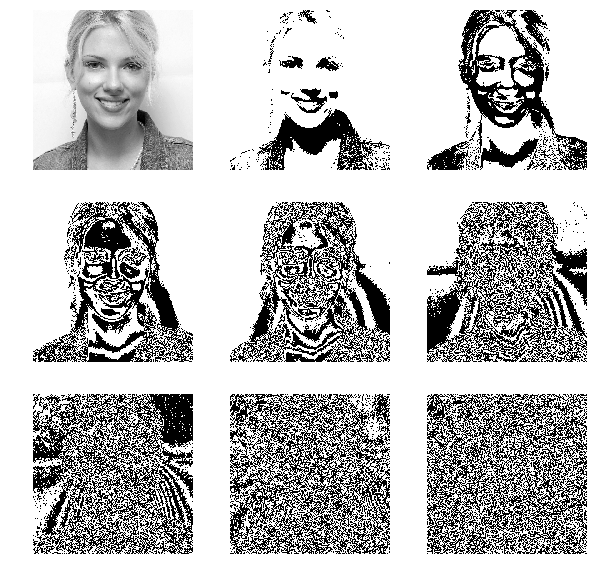

In [29]:
plt.figure(figsize=(10,10))

## bit-wise operator AND using mask defined by the bits below
img2_b1 = img2 & 0b10000000
img2_b2 = img2 & 0b01000000
img2_b3 = img2 & 0b00100000
img2_b4 = img2 & 0b00010000
img2_b5 = img2 & 0b00001000
img2_b6 = img2 & 0b00000100
img2_b7 = img2 & 0b00000010
img2_b8 = img2 & 0b00000001

plt.subplot(331)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.subplot(332)
plt.imshow(img2_b1, cmap='gray')
plt.axis('off')
plt.subplot(333)
plt.imshow(img2_b2, cmap='gray')
plt.axis('off')
plt.subplot(334)
plt.imshow(img2_b3, cmap='gray')
plt.axis('off')
plt.subplot(335)
plt.imshow(img2_b4, cmap='gray')
plt.axis('off')
plt.subplot(336)
plt.imshow(img2_b5, cmap='gray')
plt.axis('off')
plt.subplot(337)
plt.imshow(img2_b6, cmap='gray')
plt.axis('off')
plt.subplot(338)
plt.imshow(img2_b7, cmap='gray')
plt.axis('off')
plt.subplot(339)
plt.imshow(img2_b8, cmap='gray')
plt.axis('off')